# Data Science Group Project
### Group 51
Thuseevan Nareshkumar 46328785 <br>
Ryan Lam 45951292
### Name and Student number 
add you name here then remove this 

# Executive Summary
work on it

# Introduction
work on it

# Project Goal
# work on it make it dot points 
One key objective we would like to explore with our chosen dataframe is to take
advantage of the various sources to reach an optimal conclusion that will help with
either decision making/support.
We are eager to provide an analysis that will enable us to correlate trends/patterns with
real world activities. From this, we aim to provide a sustainable solution that in hope
answers the distinction between an array of transportation rush hours, off-peak hours
and outliers. We will also aim to challenge ourselves


# Data source

The dataset is from the Bureau of Transport Statistics. This dataset contains NSW trains official train utilisation figures for Intercity train lines only. These figures include the data of passengers who on/tap off well as passeners who bought tickets when entering and exiting the transportation service stations. It is set out as a line and aggregated into a monthly figure for a passenger for their estimated times of travel during that month. 
The data was collected from opal train trips by month,line and card type, from July 2016 to August 2021. The format of the data set is in CSV. Here is a link to the relevant document page: https://opendata.transport.nsw.gov.au/dataset/opal-trips-train.

# Cleaning the data

In [420]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pylab as plt
from matplotlib.pyplot import imread
%matplotlib inline

#---Linear Regression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

#---naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

#---KMeans Clustering 
from sklearn.cluster import KMeans

#---feature selection
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

#---data processing
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split

import warnings

In [421]:
#We tried importing the file, but this method didn’t work for some reason.
#pd.show_versions()
#data = pd.read_csv("files/TrainCardType.csv")
# we had error opeing the file

In [422]:
#We realised that there was an error with encoding the file. After resolving the the issue, we were able to import the file.
# importing the file
data = pd.read_csv("files/TrainCardType.csv", encoding='utf-16',sep="\t")

In [423]:
# renaming 
data = data.rename(columns={"1/07/2016+C1:BA1": "Jul-16","Travel type": "Travel_type" })
#data.head()

In [424]:
#checking the data set size 
print("The size of the data is : ", data.shape) 
print("The number of row {} and number of columns {} ".format(data.shape[0], data.shape[1]))

The size of the data is :  (248, 65)
The number of row 248 and number of columns 65 


In [425]:
# checking data type 
print(type(data))
print(type(data['Jul-16']))
print(type(data['Jul-16'][0]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'str'>


Note: The data set have too many null value. Dropping the null value drop almost 70% of the data. We tried dropping the value but too many rows and coulmns were droped

In [426]:
# Deal with the NaN values in the data
data.isna().sum()

Route            0
Travel_type      0
Jul-16         139
Aug-16         139
Sep-16         139
              ... 
May-21          69
Jun-21          69
Jul-21          75
Aug-21          73
Sep-21          73
Length: 65, dtype: int64

In [427]:
# data_name = list(data)
# data_name_length = len(data_name)
# data_name_length

# Functions to remove ',' 

In [428]:
data = data.replace(',','', regex=True)


In [429]:

for x in data.columns[2:]:
    data[x] = pd.to_numeric(data[x])
# data.columns = pd.to_numeric(data.columns[2:])


In [430]:
#The data set have too many null value. Dropping the null value drop almost 70% of the data.
#We tried dropping the value but too many rows and coulmns were droped
#data =data.dropna()
#data.shape
#data.head(2)





In [431]:
data = data.drop(data.index[247]) ## drop the grand total from the dataframe 


In [432]:
#we decide to assign 0 to null values
data.fillna( 0, inplace = True)
#data.head(2)

In [433]:
## new column to merge all trainline 

data['TrainLine'] = data['Route'].str[0:2] ## targets the first two string from order date 
data['TrainLine'] = data['TrainLine'].astype('object')
data.head(25)

data['TrainLine']

0      T1
1      T1
2      T1
3      T1
4      T1
       ..
242    T9
243    T9
244    T9
245    T9
246    T9
Name: TrainLine, Length: 247, dtype: object

In [434]:
## reset index
data = data.dropna()
data = data.reset_index(drop=True)


In [435]:
# str to int before we work on the data
#x= data['Jul-16'][0].replace(",","")
data

,Route,Travel_type,Jul-16,Aug-16,Sep-16,Oct-16,Nov-16,Dec-16,Jan-17,Feb-17,...,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21,TrainLine
0,T1 North Shore Northern and Western Line,Adult,8575135.0,9484134.0,8956112.0,8778524.0,9221978.0,8036202.0,7774754.0,8446672.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T1
1,T1 North Shore Northern and Western Line,Child/Youth,432083.0,370300.0,425154.0,438430.0,404288.0,505401.0,552039.0,394228.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T1
2,T1 North Shore Northern and Western Line,Concession,790206.0,1081373.0,855554.0,839434.0,677907.0,524749.0,488489.0,607040.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T1
3,T1 North Shore Northern and Western Line,Day Pass Child/Youth w/o SAF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T1
4,T1 North Shore Northern and Western Line,Day Pass without SAF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,T9 Northern Line,Free Travel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,527.0,767.0,778.0,977.0,905.0,713.0,146.0,91.0,129.0,T9
243,T9 Northern Line,School Student,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4464.0,76522.0,88883.0,40886.0,85542.0,60247.0,218.0,280.0,218.0,T9
244,T9 Northern Line,Senior/Pensioner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86556.0,116405.0,134217.0,149381.0,155281.0,112473.0,28833.0,22091.0,24927.0,T9
245,T9 Northern Line,Sgl Trip Rail Adult,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,836.0,1189.0,1295.0,2172.0,1663.0,927.0,187.0,130.0,162.0,T9


# we can split the data fram into years 2016,2017,2018,2019,2020,2021

In [436]:
df2016 = data[['TrainLine','Travel_type','Jul-16','Aug-16','Sep-16','Oct-16','Nov-16','Dec-16']]
df2017 = data[['TrainLine','Travel_type','Jan-17','Feb-17','Mar-17','Apr-17','May-17','Jun-17','Jul-17','Aug-17','Sep-17','Oct-17','Nov-17','Dec-17']]
df2018 = data[['TrainLine','Travel_type','Jan-18','Feb-18','Mar-18','Apr-18','May-18','Jun-18','Jul-18','Aug-18','Sep-18','Oct-18','Nov-18','Dec-18']]
df2019 = data[['TrainLine','Travel_type','Jan-19','Feb-19','Mar-19','Apr-19','May-19','Jun-19','Jul-19','Aug-19','Sep-19','Oct-19','Nov-19','Dec-19']]
df2020 = data[['TrainLine','Travel_type','Jan-20','Feb-20','Mar-20','Apr-20','May-20','Jun-20','Jul-20','Aug-20','Sep-20','Oct-20','Nov-20','Dec-20']]
df2021 = data[['TrainLine','Travel_type','Jan-21','Feb-21','Mar-21','Apr-21','May-21','Jun-21','Jul-21','Aug-21','Sep-21']]


In [437]:
## filtering adult coloumn 
adult16 = df2016[df2016.Travel_type == 'Adult']
adult17 = df2017[df2017.Travel_type == 'Adult']
adult18 = df2018[df2018.Travel_type == 'Adult']
adult19 = df2019[df2019.Travel_type == 'Adult']
adult20 = df2020[df2020.Travel_type == 'Adult']
adult21 = df2021[df2021.Travel_type == 'Adult']

Concession16 = df2016[df2016.Travel_type == 'Concession']
Concession17 = df2017[df2017.Travel_type == 'Concession']
Concession18 = df2018[df2018.Travel_type == 'Concession']
Concession19 = df2019[df2019.Travel_type == 'Concession']
Concession20 = df2020[df2020.Travel_type == 'Concession']
Concession21 = df2021[df2021.Travel_type == 'Concession']


In [438]:
## group by the trainline and travel type 
adult16 = adult16.groupby(['Travel_type','TrainLine'])
adult17 = adult17.groupby(['Travel_type','TrainLine'])
adult18 = adult18.groupby(['Travel_type','TrainLine'])
adult19 = adult19.groupby(['Travel_type','TrainLine'])
adult20 = adult20.groupby(['Travel_type','TrainLine'])
adult21 = adult21.groupby(['Travel_type','TrainLine'])

Concession16 = Concession16.groupby(['Travel_type','TrainLine'])
Concession17 = Concession17.groupby(['Travel_type','TrainLine'])
Concession18 = Concession18.groupby(['Travel_type','TrainLine'])
Concession19 = Concession19.groupby(['Travel_type','TrainLine'])
Concession20 = Concession20.groupby(['Travel_type','TrainLine'])
Concession21 = Concession21.groupby(['Travel_type','TrainLine'])




In [439]:
## multiple row Referring to the same trainline 


In [440]:
## final sum of the tables yearly 

In [441]:
sumadult16 = adult16.sum()
sumadult17 = adult17.sum()
sumadult18 = adult18.sum()
sumadult19 = adult19.sum()
sumadult20 = adult20.sum()
sumadult21 = adult21.sum()

sumConcession16 = Concession16.sum()
sumConcession17 = Concession17.sum()
sumConcession18 = Concession18.sum()
sumConcession19 = Concession19.sum()
sumConcession20 = Concession20.sum()
sumConcession21 = Concession21.sum()

## final table that has the total adult table with yearly total 

In [442]:
sumadult21

Jan-21     Feb-21     Mar-21     Apr-21     May-21  \
Travel_type TrainLine                                                          
Adult       Bl          191587.0   215611.0   248167.0   267221.0   243592.0   
            Ce          306328.0   400043.0   456765.0   474845.0   478407.0   
            Hu           15693.0    19030.0    19000.0    21817.0    22552.0   
            So          194022.0   231817.0   268885.0   258594.0   272613.0   
            St               0.0        0.0        0.0        0.0        0.0   
            T1         2072890.0  2732176.0  3186268.0  3139610.0  3270742.0   
            T2         1265795.0  1531228.0  1798040.0  1642978.0  1600892.0   
            T3          639096.0   781137.0   851759.0   850934.0   846030.0   
            T4         1538773.0  1713603.0  1982189.0  1856641.0  1937118.0   
            T5          201514.0   293372.0   284364.0   279616.0   305354.0   
            T6            5673.0     6984.0     8548.0     7824.0     8229.0   
            T7           19725.0    29285.0    37870.0    65358.0    48087.0   
            T8          827040.0  1028685.0  1228446.0  1195959.0  1203356.0   
            T9          591055.0   698236.0   772130.0   790858.0   846242.0   

                          Jun-21    Jul-21    Aug-21    Sep-21  
Travel_type TrainLine                                           
Adult       Bl          218192.0   73486.0   51628.0   54772.0  
            Ce          364493.0  115111.0   91711.0   92176.0  
            Hu           18955.0   13904.0    6379.0    4551.0  
            So          216014.0   65771.0   56574.0   54467.0  
            St               0.0       0.0       0.0       0.0  
            T1         2671322.0  922742.0  744936.0  789155.0  
            T2         1494399.0  559423.0  449097.0  479690.0  
            T3          706701.0  208600.0  198920.0  231984.0  
            T4         1596551.0  631262.0  530477.0  534231.0  
            T5          244406.0  100527.0   62668.0   71368.0  
            T6            7560.0    3908.0    3310.0    4102.0  
            T7           51312.0   25498.0   35077.0   33909.0  
            T8          999705.0  362972.0  255058.0  269797.0  
            T9          618143.0  220326.0  187027.0  194425.0

In [443]:
sumConcession21

Jan-21    Feb-21    Mar-21    Apr-21    May-21  \
Travel_type TrainLine                                                     
Concession  Bl          14093.0   20488.0   34830.0   29678.0   28821.0   
            Ce          27603.0   44189.0   75823.0   61827.0   68375.0   
            Hu           2066.0    3834.0    7063.0    5815.0    7781.0   
            So          14634.0   22587.0   37549.0   30148.0   33217.0   
            St              0.0       0.0       0.0       0.0       0.0   
            T1         174608.0  279788.0  458033.0  366573.0  382740.0   
            T2         100849.0  161106.0  252608.0  188122.0  185025.0   
            T3          50544.0   84021.0  125427.0  103522.0  100372.0   
            T4         108039.0  145573.0  215502.0  171811.0  181152.0   
            T5          14194.0   29189.0   42656.0   33213.0   36245.0   
            T6            421.0     543.0     803.0     694.0     732.0   
            T7           1121.0    2042.0    3669.0    6312.0    4302.0   
            T8          65615.0  102730.0  157702.0  123187.0  125765.0   
            T9          55153.0   84507.0  129248.0  106726.0  114341.0   

                         Jun-21   Jul-21   Aug-21   Sep-21  
Travel_type TrainLine                                       
Concession  Bl          20729.0   3274.0   2023.0   2095.0  
            Ce          40290.0   6683.0   4640.0   4599.0  
            Hu           3289.0   2510.0    905.0    527.0  
            So          22117.0   3618.0   3215.0   2800.0  
            St              0.0      0.0      0.0      0.0  
            T1         261707.0  51850.0  38330.0  39946.0  
            T2         151407.0  25580.0  16866.0  18259.0  
            T3          73846.0  10789.0   9501.0  10790.0  
            T4         133337.0  30578.0  23371.0  24111.0  
            T5          23978.0   3587.0   1315.0   1654.0  
            T6            642.0    238.0    178.0    134.0  
            T7           4321.0   1061.0   1745.0   1595.0  
            T8          93683.0  19999.0  11707.0  12947.0  
            T9          72774.0  12120.0   8798.0   8911.0

In [444]:
# df2016 = df2016.groupby(['TrainLine','Travel_type'])
# df2017 = df2017.groupby(['TrainLine','Travel_type'])
# df2018 = df2018.groupby(['TrainLine','Travel_type'])
# df2019 = df2019.groupby(['TrainLine','Travel_type'])
# df2020 = df2020.groupby(['TrainLine','Travel_type'])
# df2021 = df2021.groupby(['TrainLine','Travel_type'])


Text(0, 0.5, 'Number of hits')

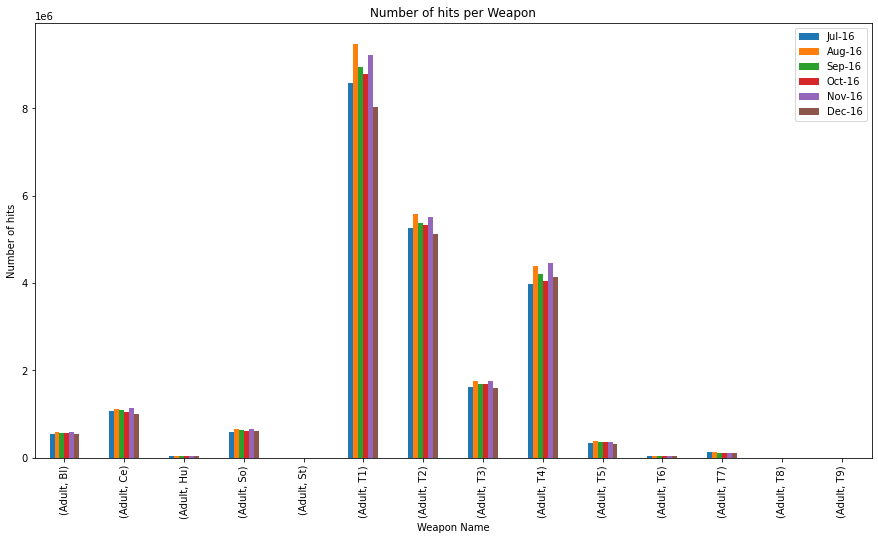

In [445]:
plot = sumadult16.plot(kind='bar',figsize=(15,8), title="Number of hits per Weapon",)
plot.set_xlabel("Weapon Name")
plot.set_ylabel("Number of hits")


Text(0, 0.5, 'Number of hits')

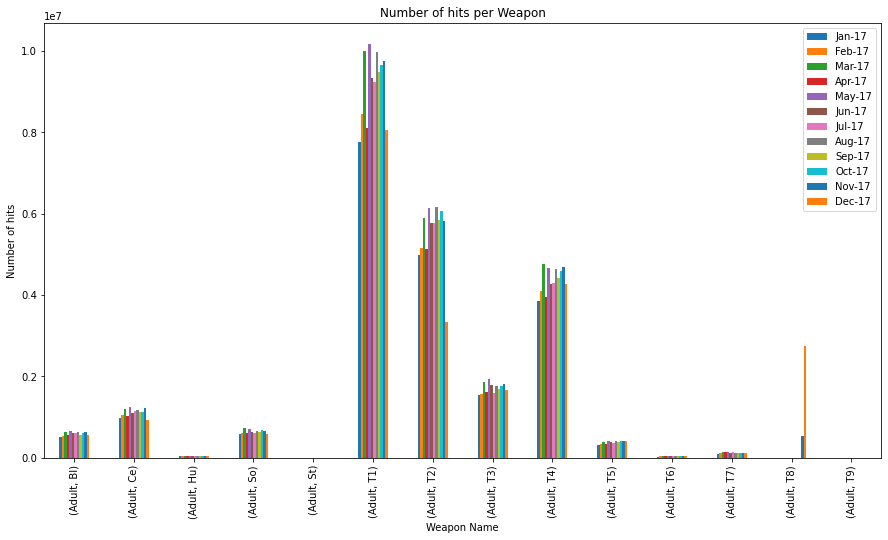

In [446]:
plot = sumadult17.plot(kind='bar',figsize=(15,8), title="Number of hits per Weapon",)
plot.set_xlabel("Weapon Name")
plot.set_ylabel("Number of hits")


Text(0, 0.5, 'Number of hits')

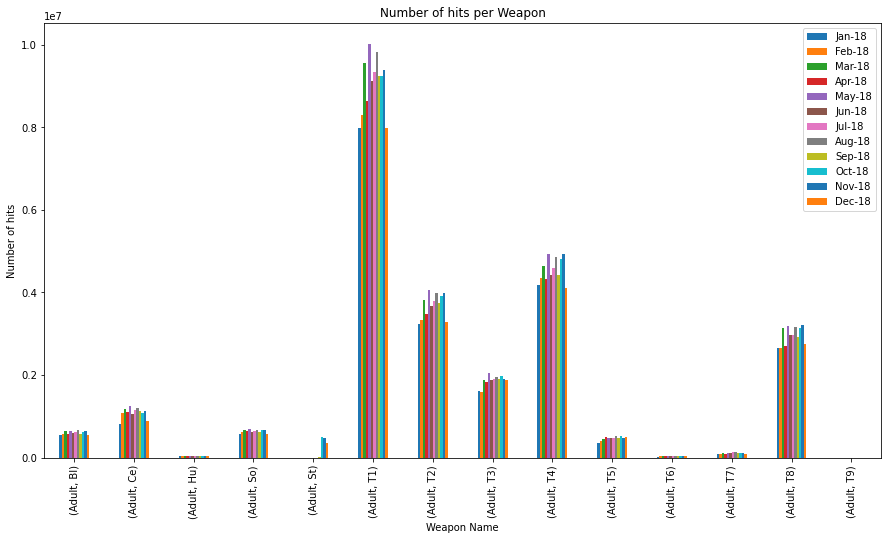

In [447]:
plot = sumadult18.plot(kind='bar',figsize=(15,8), title="Number of hits per Weapon",)
plot.set_xlabel("Weapon Name")
plot.set_ylabel("Number of hits")


Text(0, 0.5, 'Number of hits')

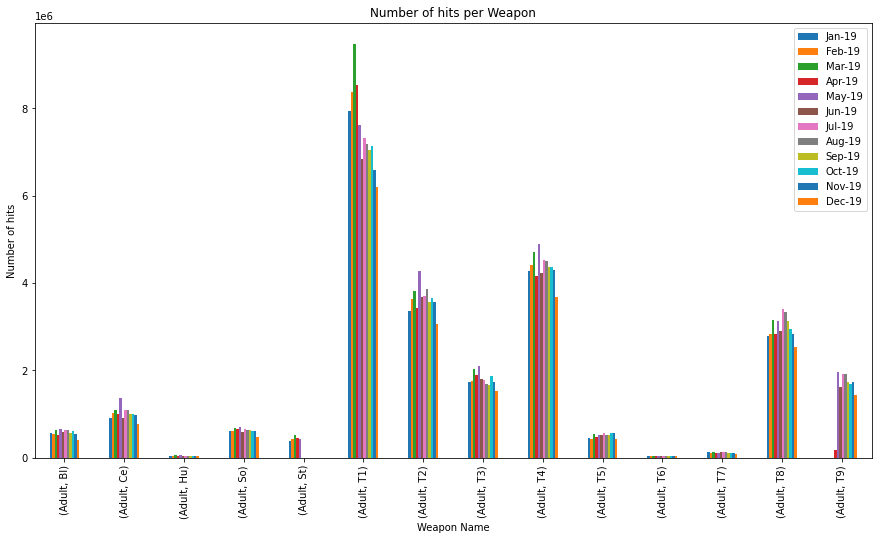

In [448]:
plot = sumadult19.plot(kind='bar',figsize=(15,8), title="Number of hits per Weapon",)
plot.set_xlabel("Weapon Name")
plot.set_ylabel("Number of hits")


Text(0, 0.5, 'Number of hits')

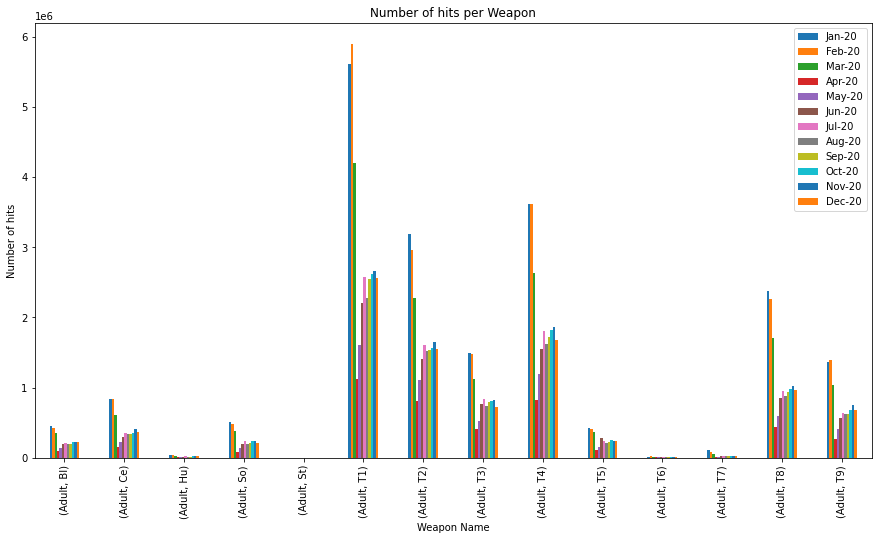

In [449]:
plot = sumadult20.plot(kind='bar',figsize=(15,8), title="Number of hits per Weapon",)
plot.set_xlabel("Weapon Name")
plot.set_ylabel("Number of hits")


Text(0, 0.5, 'Number of hits')

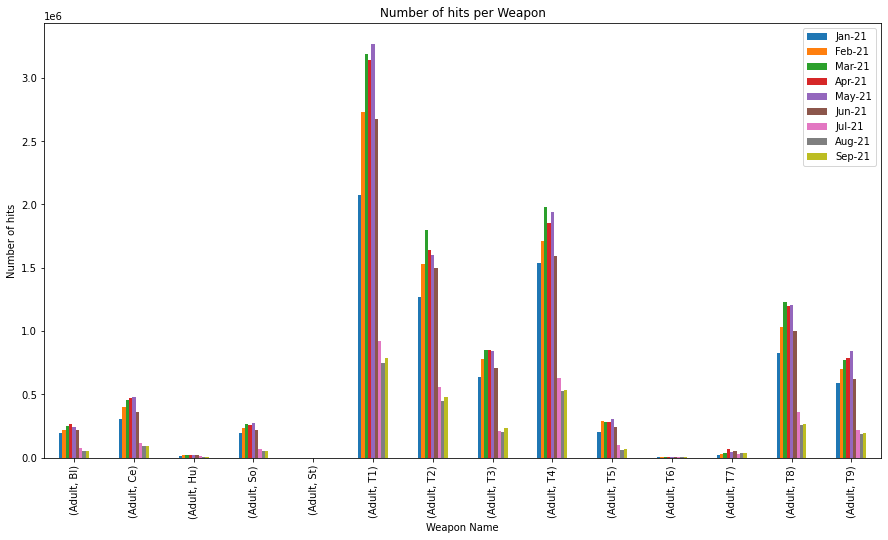

In [450]:
plot = sumadult21.plot(kind='bar',figsize=(15,8), title="Number of hits per Weapon",)
plot.set_xlabel("Weapon Name")
plot.set_ylabel("Number of hits")


In [451]:
sum2016 = adult16.sum()
sum2017 = adult17.sum()
sum2018 = adult18.sum()
sum2019 = adult19.sum()
sum2020 = adult20.sum()
sum2021 = adult21.sum()

In [452]:
sum2016

Jul-16     Aug-16     Sep-16     Oct-16     Nov-16  \
Travel_type TrainLine                                                          
Adult       Bl          537669.0   578758.0   570413.0   571910.0   585478.0   
            Ce         1073971.0  1125393.0  1090172.0  1051048.0  1126345.0   
            Hu           35095.0    29693.0    36901.0    35439.0    39132.0   
            So          578349.0   649695.0   626685.0   609826.0   663417.0   
            St               0.0        0.0        0.0        0.0        0.0   
            T1         8575135.0  9484134.0  8956112.0  8778524.0  9221978.0   
            T2         5266404.0  5568667.0  5382635.0  5328090.0  5519508.0   
            T3         1615473.0  1767064.0  1689548.0  1691384.0  1747282.0   
            T4         3970697.0  4389115.0  4212808.0  4042741.0  4461496.0   
            T5          335951.0   372709.0   358049.0   349051.0   362326.0   
            T6           31864.0    40123.0    35855.0    33920.0    36327.0   
            T7          124590.0   124612.0   102987.0   116328.0   104223.0   
            T8               0.0        0.0        0.0        0.0        0.0   
            T9               0.0        0.0        0.0        0.0        0.0   

                          Dec-16  
Travel_type TrainLine             
Adult       Bl          541787.0  
            Ce          998680.0  
            Hu           33766.0  
            So          608878.0  
            St               0.0  
            T1         8036202.0  
            T2         5124055.0  
            T3         1588061.0  
            T4         4147929.0  
            T5          322395.0  
            T6           30726.0  
            T7           99922.0  
            T8               0.0  
            T9               0.0

Text(0, 0.5, 'Number of hits')

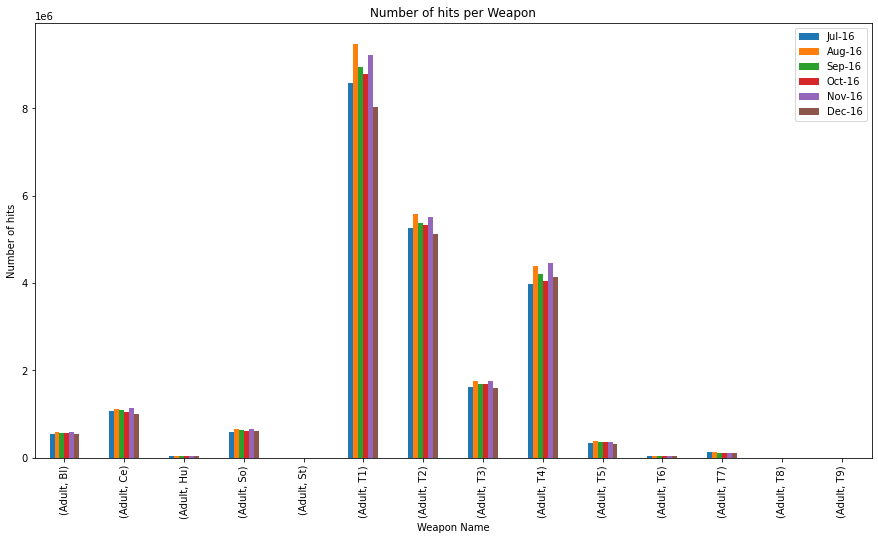

In [453]:
plot = sum2016.plot(kind='bar',figsize=(15,8), title="Number of hits per Weapon",)
plot.set_xlabel("Weapon Name")
plot.set_ylabel("Number of hits")


In [454]:
## create separate dataframes
## add total column 
sumadult16['TotalCountbyTrainLine'] = sumadult16['Jul-16'] + sumadult16['Aug-16'] + sumadult16['Sep-16'] + sumadult16['Oct-16'] + sumadult16['Nov-16'] + sumadult16['Dec-16'] 
sumadult17['TotalCountbyTrainLine'] = sumadult17['Jan-17'] + sumadult17['Feb-17'] + sumadult17['Mar-17'] + sumadult17['Apr-17'] + sumadult17['May-17'] + sumadult17['Jun-17'] + sumadult17['Jul-17'] + sumadult17['Aug-17'] + sumadult17['Sep-17'] + sumadult17['Oct-17'] + sumadult17['Nov-17'] + sumadult17['Dec-17'] 
sumadult18['TotalCountbyTrainLine'] = sumadult18['Jan-18'] + sumadult18['Feb-18'] + sumadult18['Mar-18'] + sumadult18['Apr-18'] + sumadult18['May-18'] + sumadult18['Jun-18'] + sumadult18['Jul-18'] + sumadult18['Aug-18'] + sumadult18['Sep-18'] + sumadult18['Oct-18'] + sumadult18['Nov-18'] + sumadult18['Dec-18'] 
sumadult19['TotalCountbyTrainLine'] = sumadult19['Jan-19'] + sumadult19['Feb-19'] + sumadult19['Mar-19'] + sumadult19['Apr-19'] + sumadult19['May-19'] + sumadult19['Jun-19'] + sumadult19['Jul-19'] + sumadult19['Aug-19'] + sumadult19['Sep-19'] + sumadult19['Oct-19'] + sumadult19['Nov-19'] + sumadult19['Dec-19'] 
sumadult20['TotalCountbyTrainLine'] = sumadult20['Jan-20'] + sumadult20['Feb-20'] + sumadult20['Mar-20'] + sumadult20['Apr-20'] + sumadult20['May-20'] + sumadult20['Jun-20'] + sumadult20['Jul-20'] + sumadult20['Aug-20'] + sumadult20['Sep-20'] + sumadult20['Oct-20'] + sumadult20['Nov-20'] + sumadult20['Dec-20'] 
sumadult21['TotalCountbyTrainLine'] = sumadult21['Jan-21'] + sumadult21['Feb-21'] + sumadult21['Mar-21'] + sumadult21['Apr-21'] + sumadult21['May-21'] + sumadult21['Jun-21'] + sumadult21['Jul-21'] + sumadult21['Aug-21'] + sumadult21['Sep-21'] 
#sumadult20['TotalCountbyTrainLine'] = sumadult20['TotalCountbyTrainLine'].astype('int32')


In [455]:
sumadult21

Jan-21     Feb-21     Mar-21     Apr-21     May-21  \
Travel_type TrainLine                                                          
Adult       Bl          191587.0   215611.0   248167.0   267221.0   243592.0   
            Ce          306328.0   400043.0   456765.0   474845.0   478407.0   
            Hu           15693.0    19030.0    19000.0    21817.0    22552.0   
            So          194022.0   231817.0   268885.0   258594.0   272613.0   
            St               0.0        0.0        0.0        0.0        0.0   
            T1         2072890.0  2732176.0  3186268.0  3139610.0  3270742.0   
            T2         1265795.0  1531228.0  1798040.0  1642978.0  1600892.0   
            T3          639096.0   781137.0   851759.0   850934.0   846030.0   
            T4         1538773.0  1713603.0  1982189.0  1856641.0  1937118.0   
            T5          201514.0   293372.0   284364.0   279616.0   305354.0   
            T6            5673.0     6984.0     8548.0     7824.0     8229.0   
            T7           19725.0    29285.0    37870.0    65358.0    48087.0   
            T8          827040.0  1028685.0  1228446.0  1195959.0  1203356.0   
            T9          591055.0   698236.0   772130.0   790858.0   846242.0   

                          Jun-21    Jul-21    Aug-21    Sep-21  \
Travel_type TrainLine                                            
Adult       Bl          218192.0   73486.0   51628.0   54772.0   
            Ce          364493.0  115111.0   91711.0   92176.0   
            Hu           18955.0   13904.0    6379.0    4551.0   
            So          216014.0   65771.0   56574.0   54467.0   
            St               0.0       0.0       0.0       0.0   
            T1         2671322.0  922742.0  744936.0  789155.0   
            T2         1494399.0  559423.0  449097.0  479690.0   
            T3          706701.0  208600.0  198920.0  231984.0   
            T4         1596551.0  631262.0  530477.0  534231.0   
            T5          244406.0  100527.0   62668.0   71368.0   
            T6            7560.0    3908.0    3310.0    4102.0   
            T7           51312.0   25498.0   35077.0   33909.0   
            T8          999705.0  362972.0  255058.0  269797.0   
            T9          618143.0  220326.0  187027.0  194425.0   

                       TotalCountbyTrainLine  
Travel_type TrainLine                         
Adult       Bl                     1564256.0  
            Ce                     2779879.0  
            Hu                      141881.0  
            So                     1618757.0  
            St                           0.0  
            T1                    19529841.0  
            T2                    10821542.0  
            T3                     5315161.0  
            T4                    12320845.0  
            T5                     1843189.0  
            T6                       56138.0  
            T7                      346121.0  
            T8                     7371018.0  
            T9                     4918442.0

In [456]:
# Initalise train and test variable 
train, test = train_test_split(data, test_size = 0.2, random_state=142)
print(train.shape)
print(test.shape)

(197, 66)
(50, 66)


In [457]:
reg = linear_model.LinearRegression()
X_train = train[['Dec-18', 'Dec-19']]
y_train = train['Dec-20']
X_test = test[['Dec-18', 'Dec-19']]
y_test = test['Dec-20']
reg.fit(X_train, y_train)
print("y = x *", reg.coef_, "+", reg.intercept_) 

y = x * [-0.094839 0.558936] + 10136.300965680646


In [458]:
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("MSE:", mse) ##mean square error if it's too low means its good
print("R Squared:", r2) 

MSE: 2011424333.764968
R Squared: 0.9381552198818713


In [459]:
predicted = reg.predict(X_test)
mse = ((np.array(y_test)-predicted)**2).sum()/len(y_test)
r2 = r2_score(y_test, predicted)
print("MSE:", mse)
print("R Squared:", r2) 


MSE: 2011424333.764968
R Squared: 0.9381552198818713


In [460]:
#there are no apparent curves in the plots (meaning the model is linear in the parameters and its residuals)
#the process of obtaining one observation does not affect the process of obtaining the next observations (independence)
# why the r square is close to 1, the model is bias and we cannot rely on a regression to predict future outcome by past records
# we will now move on to multinomial naive bayes below in order to see if it can be predicted by past records.

In [461]:
data['Dec-19'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
         ...   
242      1143.0
243     40937.0
244    183786.0
245      4832.0
246      1671.0
Name: Dec-19, Length: 247, dtype: float64>

In [462]:
data['Dec-20'].max()

1671861.0

In [463]:
data['Dec-18'].max()

4108485.0

In [464]:
data['Dec-19'].max()

3673566.0

In [465]:
#---creating a new dataframe with the relevant datasets
dftest = data[['Dec-18','Dec-19','Dec-20']]

#---dropping null values and resetting the index
dftest = df_hits.dropna()
dftest = df_hits.reset_index(drop=True)

# performing a multinomial naive bayes analysis on the data


In [466]:
#---performing a multinomial naive bayes analysis on the data
clf = MultinomialNB()
data = dftest[['Dec-18','Dec-19']]
target = dftest[['Dec-20']]
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size = 0.70, random_state=0)

y_train=y_train.values
clf.fit (X_train, y_train)

y_test=y_test.values
y_pred = clf.predict(X_test)

print("Multinomial:", np.mean(y_pred==y_test))

Multinomial: 0.08284444444444444


The results from the naive bayes analysis -- similar to the linear regression -- are poor in the context of the data, though there is some level of prediction to be made. What this means is that past records from previous year can change due to external circumstances. for example, due to the covid pandemic, the sum of train attendance has staggared in comparison to previous years


Testing accuracy is: 0.8000



In [102]:
# Explore the learned model parameters (probabilities)
# Note that the probabilities are in the logorithmic form. Why? The log-sum-exp trick for underflow of probability products
print('Estimated probability of classess: \n', np.e**clf_mnb.class_log_prior_)
print('Estimated class-conditional probabilities for each feature: \n', np.e**clf_mnb.feature_log_prob_)

Estimated probability of classess: 
 [0.24864865 0.01621622 0.00540541 0.01081081 0.01081081 0.00540541
 0.00540541 0.00540541 0.00540541 0.00540541 0.01081081 0.00540541
 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541
 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541
 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541
 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541
 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541
 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541
 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541
 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541
 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541
 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541
 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541
 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541 0.00540541
 0.00540541 0.00540541 0.

In [46]:
# ## indiviudal trainline from 2016
# T1_2016 = df2016[df2016 == "T1 North Shore, Northern and Western Line"] + df2016[df2016 == "T1 North Shore Line"] + df2016[df2016 == "T1 Northern Line"] + df2016[df2016 == "T1 Western Line"] 
# T2_2016 = df2016[df2016.Route == "T2 Airport, Inner West and South Line"] + df2016[df2016.Route == "T2 Inner West Line"] + df2016[df2016.Route == "T2 Leppington Line"]
# T3_2016 = df2016[df2016.Route == "T3 Bankstown Line"]
# T4_2016 = df2016[df2016.Route == "T4 Eastern Suburbs and Illawarra Line"]
# T5_2016 = df2016[df2016.Route == "T5 Cumberland Line"]
# T6_2016 = df2016[df2016.Route == "T6 Carlingford Line"] + df2016[df2016.Route == "T6 replacement buses"]
# T7_2016 = df2016[df2016.Route == "T7 Olympic Park Line"]
# T8_2016 = df2016[df2016.Route == "T8 Airport and South Line"]
# T9_2016 = df2016[df2016.Route == "T9 Northern Line"]
# BM_2016 = df2016[df2016.Route == "Blue Mountains Line"]
# CC_2016 = df2016[df2016.Route == "Central Coast Newcastle Line"]
# HL_2016 = df2016[df2016.Route == "Hunter Line"]
# SC_2016 = df2016[df2016.Route == "South Coast Line"]
# SH_2016 = df2016[df2016.Route == "Southern Highlands Line"]
# SL_2016 = df2016[df2016.Route == "Station Link"]





In [47]:
# ## indiviudal trainline from 2017
# T1_2017 = df2017[df2017.Route == "T1 North Shore, Northern and Western Line"] + df2017[df2017.Route == "T1 North Shore Line"] + df2017[df2017.Route == "T1 Northern Line"] + df2017[df2017.Route == "T1 Western Line"] 
# T2_2017 = df2017[df2017.Route == "T2 Airport, Inner West and South Line"] + df2017[df2017.Route == "T2 Inner West Line"] + df2017[df2017.Route == "T2 Leppington Line"]
# T3_2017 = df2017[df2017.Route == "T3 Bankstown Line"]
# T4_2017 = df2017[df2017.Route == "T4 Eastern Suburbs and Illawarra Line"]
# T5_2017 = df2017[df2017.Route == "T5 Cumberland Line"]
# T6_2017 = df2017[df2017.Route == "T6 Carlingford Line"] + df2017[df2017.Route == "T6 replacement buses"]
# T7_2017 = df2017[df2017.Route == "T7 Olympic Park Line"]
# T8_2017 = df2017[df2017.Route == "T8 Airport and South Line"]
# T9_2017 = df2017[df2017.Route == "T9 Northern Line"]
# BM_2017 = df2017[df2017.Route == "Blue Mountains Line"]
# CC_2017 = df2017[df2017.Route == "Central Coast Newcastle Line"]
# HL_2017 = df2017[df2017.Route == "Hunter Line"]
# SC_2017 = df2017[df2017.Route == "South Coast Line"]
# SH_2017 = df2017[df2017.Route == "Southern Highlands Line"]
# SL_2017 = df2017[df2017.Route == "Station Link"]

In [48]:
# ## inIndividual trainlines from 2017
# T1_2018 = df2018[df2018.Route == "T1 North Shore, Northern and Western Line"] + df2018[df2018.Route == "T1 North Shore Line"] + df2018[df2018.Route == "T1 Northern Line"] + df2018[df2018.Route == "T1 Western Line"] 
# T2_2018 = df2018[df2018.Route == "T2 Airport, Inner West and South Line"] + df2018[df2018.Route == "T2 Inner West Line"] + df2018[df2018.Route == "T2 Leppington Line"]
# T3_2018 = df2018[df2018.Route == "T3 Bankstown Line"]
# T4_2018 = df2018[df2018.Route == "T4 Eastern Suburbs and Illawarra Line"]
# T5_2018 = df2018[df2018.Route == "T5 Cumberland Line"]
# T6_2018 = df2018[df2018.Route == "T6 Carlingford Line"] + df2018[df2018.Route == "T6 replacement buses"]
# T7_2018 = df2018[df2018.Route == "T7 Olympic Park Line"]
# T8_2018 = df2018[df2018.Route == "T8 Airport and South Line"]
# T9_2018 = df2018[df2018.Route == "T9 Northern Line"]
# BM_2018 = df2018[df2018.Route == "Blue Mountains Line"]
# CC_2018 = df2018[df2018.Route == "Central Coast Newcastle Line"]
# HL_2018 = df2018[df2018.Route == "Hunter Line"]
# SC_2018 = df2018[df2018.Route == "South Coast Line"]
# SH_2018 = df2018[df2018.Route == "Southern Highlands Line"]
# SL_2018 = df2018[df2018.Route == "Station Link"]

In [49]:
# ## inIndividual trainlines from 2019
# T1_2019 = df2019[df2019.Route == "T1 North Shore, Northern and Western Line"] + df2019[df2019.Route == "T1 North Shore Line"] + df2019[df2019.Route == "T1 Northern Line"] + df2019[df2019.Route == "T1 Western Line"] 
# T2_2019 = df2019[df2019.Route == "T2 Airport, Inner West and South Line"] + df2019[df2019.Route == "T2 Inner West Line"] + df2019[df2019.Route == "T2 Leppington Line"]
# T3_2019 = df2019[df2019.Route == "T3 Bankstown Line"]
# T4_2019 = df2019[df2019.Route == "T4 Eastern Suburbs and Illawarra Line"]
# T5_2019 = df2019[df2019.Route == "T5 Cumberland Line"]
# T6_2019 = df2019[df2019.Route == "T6 Carlingford Line"] + df2019[df2019.Route == "T6 replacement buses"]
# T7_2019 = df2019[df2019.Route == "T7 Olympic Park Line"]
# T8_2019 = df2019[df2019.Route == "T8 Airport and South Line"]
# T9_2019 = df2019[df2019.Route == "T9 Northern Line"]
# BM_2019 = df2019[df2019.Route == "Blue Mountains Line"]
# CC_2019 = df2019[df2019.Route == "Central Coast Newcastle Line"]
# HL_2019 = df2019[df2019.Route == "Hunter Line"]
# SC_2019 = df2019[df2019.Route == "South Coast Line"]
# SH_2019 = df2019[df2019.Route == "Southern Highlands Line"]
# SL_2019 = df2019[df2019.Route == "Station Link"]




In [50]:
# ## Individual trainlines from 2020
# T1_2020 = df2020[df2020.Route == "T1 North Shore, Northern and Western Line"] + df2020[df2020.Route == "T1 North Shore Line"] + df2020[df2020.Route == "T1 Northern Line"] + df2020[df2020.Route == "T1 Western Line"] 
# T2_2020 = df2020[df2020.Route == "T2 Airport, Inner West and South Line"] + df2020[df2020.Route == "T2 Inner West Line"] + df2020[df2020.Route == "T2 Leppington Line"]
# T3_2020 = df2020[df2020.Route == "T3 Bankstown Line"]
# T4_2020 = df2020[df2020.Route == "T4 Eastern Suburbs and Illawarra Line"]
# T5_2020 = df2020[df2020.Route == "T5 Cumberland Line"]
# T6_2020 = df2020[df2020.Route == "T6 Carlingford Line"] + df2020[df2020.Route == "T6 replacement buses"]
# T7_2020 = df2020[df2020.Route == "T7 Olympic Park Line"]
# T8_2020 = df2020[df2020.Route == "T8 Airport and South Line"]
# T9_2020 = df2020[df2020.Route == "T9 Northern Line"]
# BM_2020 = df2020[df2020.Route == "Blue Mountains Line"]
# CC_2020 = df2020[df2020.Route == "Central Coast Newcastle Line"]
# HL_2020 = df2020[df2020.Route == "Hunter Line"]
# SC_2020 = df2020[df2020.Route == "South Coast Line"]
# SH_2020 = df2020[df2020.Route == "Southern Highlands Line"]
# SL_2020 = df2020[df2020.Route == "Station Link"]


In [51]:
# ## Individual trainlines from 2020
# T1_2021 = df2021[df2021.Route == "T1 North Shore, Northern and Western Line"] + df2021[df2021.Route == "T1 North Shore Line"] + df2021[df2021.Route == "T1 Northern Line"] + df2021[df2021.Route == "T1 Western Line"] 
# T2_2021 = df2021[df2021.Route == "T2 Airport, Inner West and South Line"] + df2021[df2021.Route == "T2 Inner West Line"] + df2021[df2021.Route == "T2 Leppington Line"]
# T3_2021 = df2021[df2021.Route == "T3 Bankstown Line"]
# T4_2021 = df2021[df2021.Route == "T4 Eastern Suburbs and Illawarra Line"]
# T5_2021 = df2021[df2021.Route == "T5 Cumberland Line"]
# T6_2021 = df2021[df2021.Route == "T6 Carlingford Line"] + df2021[df2021.Route == "T6 replacement buses"]
# T7_2021 = df2021[df2021.Route == "T7 Olympic Park Line"]
# T8_2021 = df2021[df2021.Route == "T8 Airport and South Line"]
# T9_2021 = df2021[df2021.Route == "T9 Northern Line"]
# BM_2021 = df2021[df2021.Route == "Blue Mountains Line"]
# CC_2021 = df2021[df2021.Route == "Central Coast Newcastle Line"]
# HL_2021 = df2021[df2021.Route == "Hunter Line"]
# SC_2021 = df2021[df2021.Route == "South Coast Line"]
# SH_2021 = df2021[df2021.Route == "Southern Highlands Line"]
# SL_2021 = df2021[df2021.Route == "Station Link"]



In [52]:
# read the train data file and extract all name of the Route
route=pd.read_csv("files/TrainCardType.csv", encoding='utf-16',sep="\t")["Route"]
route.unique()



array(['T1 North Shore, Northern and Western Line',
       'T2 Airport, Inner West and South Line', 'T3 Bankstown Line',
       'T4 Eastern Suburbs and Illawarra Line', 'T5 Cumberland Line',
       'T6 Carlingford Line', 'T7 Olympic Park Line',
       'Blue Mountains Line', 'Central Coast Newcastle Line',
       'Hunter Line', 'South Coast Line', 'Southern Highlands Line',
       'Station Link', 'T1 North Shore Line', 'T1 Northern Line',
       'T1 Western Line', 'T2 Inner West Line', 'T2 Leppington Line',
       'T6 replacement buses', 'T8 Airport and South Line',
       'T9 Northern Line', 'Grand Total'], dtype=object)

In [53]:
# read the train data file and extract all name of the Route
df=pd.read_csv("files/TrainCardType.csv", encoding='utf-16',sep="\t")["Travel_type"]
df.unique()
    
    



               


KeyError: 'Travel_type'

In [59]:
# drop the last raw Grand Total
data_c =data.drop(246)
data_c.tail(2)

,Route,Travel_type,Jul-16,Aug-16,Sep-16,Oct-16,Nov-16,Dec-16,Jan-17,Feb-17,...,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21,TrainLine
244,T9 Northern Line,Senior/Pensioner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86556.0,116405.0,134217.0,149381.0,155281.0,112473.0,28833.0,22091.0,24927.0,T9
245,T9 Northern Line,Sgl Trip Rail Child/Youth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,941.0,726.0,783.0,1897.0,1020.0,634.0,169.0,80.0,104.0,T9


In [60]:
data_c.Route.value_counts()


T2 Leppington Line                          12
T7 Olympic Park Line                        12
Southern Highlands Line                     12
T2 Inner West Line                          12
T1 Northern Line                            12
Central Coast Newcastle Line                12
Hunter Line                                 12
T1 Western Line                             12
T1 North Shore Line                         12
South Coast Line                            12
T4 Eastern Suburbs and Illawarra Line       12
Blue Mountains Line                         12
T6 Carlingford Line                         12
T8 Airport and South Line                   12
T3 Bankstown Line                           12
T5 Cumberland Line                          12
T1 North Shore Northern and Western Line    11
T2 Airport Inner West and South Line        11
Station Link                                11
T9 Northern Line                            11
T6 replacement buses                        10
Name: Route, 

There are 21 differnt train routes 


In [61]:
data_c.describe()

,Jul-16,Aug-16,Sep-16,Oct-16,Nov-16,Dec-16,Jan-17,Feb-17,Mar-17,Apr-17,...,Dec-20,Jan-21,Feb-21,Mar-21,Apr-21,May-21,Jun-21,Jul-21,Aug-21,Sep-21
count,2.460000e+02,2.460000e+02,2.460000e+02,2.460000e+02,2.460000e+02,2.460000e+02,2.460000e+02,2.460000e+02,2.460000e+02,2.460000e+02,...,2.460000e+02,2.460000e+02,2.460000e+02,2.460000e+02,2.460000e+02,2.460000e+02,2.460000e+02,246.000000,246.000000,246.000000
mean,1.171514e+05,1.316828e+05,1.245868e+05,1.223855e+05,1.273101e+05,1.145918e+05,1.086806e+05,1.169392e+05,1.405138e+05,1.168526e+05,...,6.574173e+04,5.534837e+04,7.221246e+04,8.505898e+04,8.353791e+04,8.551604e+04,6.988841e+04,21417.260163,17259.182927,18559.808943
std,7.025108e+05,7.700106e+05,7.318773e+05,7.174205e+05,7.551649e+05,6.749103e+05,6.502254e+05,6.945896e+05,8.155599e+05,6.760672e+05,...,2.021812e+05,1.746573e+05,2.128097e+05,2.480527e+05,2.415379e+05,2.492477e+05,2.061809e+05,73792.407977,59959.022071,63298.606554
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.217500e+03,9.390000e+02,1.407500e+03,1.754000e+03,1.873500e+03,1.755500e+03,1.479000e+03,223.500000,181.000000,141.500000
75%,7.538500e+03,1.074775e+04,9.349250e+03,1.049575e+04,8.984500e+03,7.902250e+03,6.202750e+03,7.972500e+03,1.190250e+04,1.112500e+04,...,3.237475e+04,1.665600e+04,3.801225e+04,4.241475e+04,4.078750e+04,4.272225e+04,3.161875e+04,4786.750000,3227.500000,3624.500000
max,8.575135e+06,9.484134e+06,8.956112e+06,8.778524e+06,9.221978e+06,8.036202e+06,7.774754e+06,8.446672e+06,9.994667e+06,8.111738e+06,...,1.671861e+06,1.538773e+06,1.713603e+06,1.982189e+06,1.856641e+06,1.937118e+06,1.596551e+06,631262.000000,530477.000000,534231.000000


Note: The data set we have for 2016 is from july  to december 2016 and for 2019 is from januray  to september 2021

## Observations

The following code below, split the data set by years 

In [62]:
data_2016 = []
data_2017 = []
data_2018 = []
data_2019 =[]
data_2020=[]
data_2021=[]
for i in range(2,8):
    data_2016.append(data_c.columns[i])
for i in range(8,20):
    data_2017.append(data_c.columns[i])
for i in range(20,32):
    data_2018.append(data_c.columns[i])
for i in range(32,44):
    data_2019.append(data_c.columns[i])
for i in range(44,56):
    data_2020.append(data_c.columns[i])
for i in range(56,65):
    data_2021.append(data_c.columns[i])

In [63]:
data_2018

['Jan-18',
 'Feb-18',
 'Mar-18',
 'Apr-18',
 'May-18',
 'Jun-18',
 'Jul-18',
 'Aug-18',
 'Sep-18',
 'Oct-18',
 'Nov-18',
 'Dec-18']

In [64]:
data_16 = data_c[data_2016]
data_17 = data_c[data_2017]
data_18 = data_c[data_2018]
data_19 = data_c[data_2019]
data_20 = data_c[data_2020]
data_21 = data_c[data_2021]

In [70]:
total16 = (data_16.sum()).sum()
total17 = (data_17.sum()).sum()
total18 = (data_18.sum()).sum()
total19 = (data_19.sum()).sum()
total20 = (data_20.sum()).sum()
total21 = (data_21.sum()).sum()

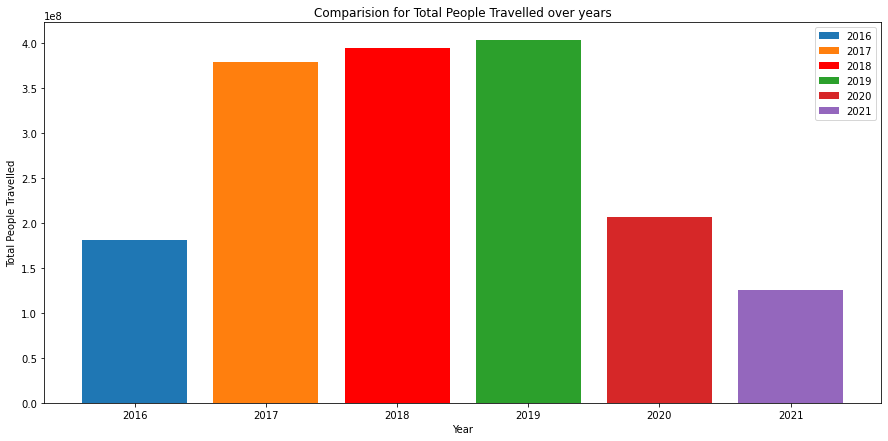

In [71]:
labels = ['2016', '2017','2018','2019','2020','2021']
plt.figure(figsize=(15,7))
plt.bar("2016", total16, align = 'center', label = '2016') 
plt.bar( "2017", total17,  align = 'center', label = '2017') 
plt.bar("2018", total18, color = 'red' ,align = 'center', label = '2018') 
plt.bar( "2019", total19,  align = 'center', label = '2019') 
plt.bar( "2020", total20, align = 'center', label = '2020') 
plt.bar( "2021", total21,  align = 'center', label = '2021') 
plt.title('Comparision for Total People Travelled over years') 
plt.ylabel('Total People Travelled') 
plt.xlabel('Year') 
plt.legend()
plt.show()

# Need to modify. add more info
We can that 2017 to 2019 number of people travelling incresed but in 2020 it has declined alot, we belive this might be caused becase of covid 19. we can't make any assumtion for 2016 and 2021 because we dont have the full data set 

<AxesSubplot:>

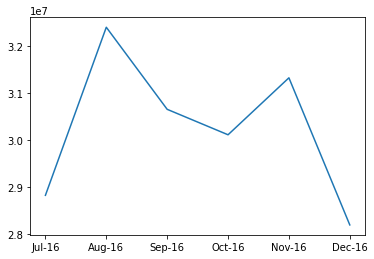

In [72]:
data_16.sum().plot()

<AxesSubplot:>

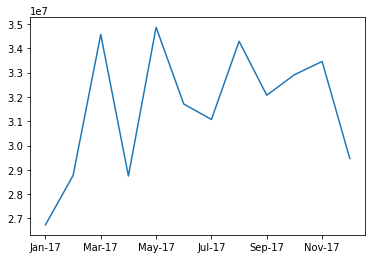

In [73]:
data_17.sum().plot()

<AxesSubplot:>

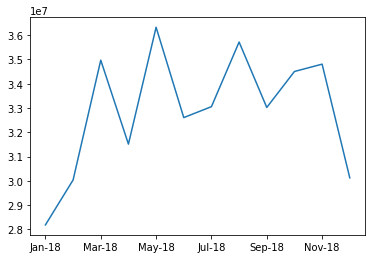

In [74]:
data_18.sum().plot()

<AxesSubplot:>

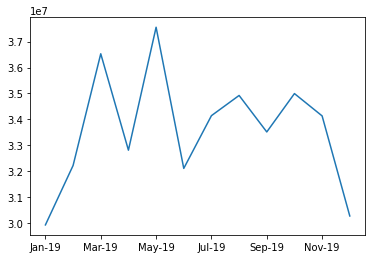

In [75]:
data_19.sum().plot()

<AxesSubplot:>

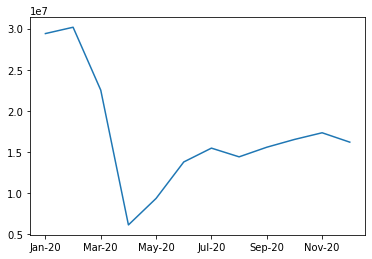

In [76]:
data_20.sum().plot()

<AxesSubplot:>

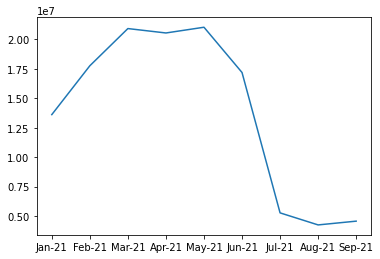

In [77]:
data_21.sum().plot()

In [78]:
# read the train data file and extract all name of the Route
route=pd.read_csv("files/TrainCardType.csv", encoding='utf-16',sep="\t")["Route"]
route.unique()

array(['T1 North Shore, Northern and Western Line',
       'T2 Airport, Inner West and South Line', 'T3 Bankstown Line',
       'T4 Eastern Suburbs and Illawarra Line', 'T5 Cumberland Line',
       'T6 Carlingford Line', 'T7 Olympic Park Line',
       'Blue Mountains Line', 'Central Coast Newcastle Line',
       'Hunter Line', 'South Coast Line', 'Southern Highlands Line',
       'Station Link', 'T1 North Shore Line', 'T1 Northern Line',
       'T1 Western Line', 'T2 Inner West Line', 'T2 Leppington Line',
       'T6 replacement buses', 'T8 Airport and South Line',
       'T9 Northern Line', 'Grand Total'], dtype=object)

In [79]:
# read the train data file and extract all name of the Route
df=pd.read_csv("files/TrainCardType.csv", encoding='utf-16',sep="\t")["Travel type"]
df.unique()

array(['Adult', 'Child/Youth', 'Concession',
       'Day Pass Child/Youth w/o SAF', 'Day Pass without SAF', 'Employee',
       'Free Travel', 'School Student', 'Senior/Pensioner',
       'Sgl Trip Rail Adult', 'Sgl Trip Rail Child/Youth', 'CTP', 'Total'],
      dtype=object)

# some useful functions 

In [ ]:
# use to drop columns
#data.drop('1/07/2016+C1:BA1', inplace=True, axis=1)

In [ ]:
#use to rename colums
#data = data.rename(columns={"1/07/2016+C1:BA1": "Jul-16"})